# 1. Importing Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import time

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Importing Data

In [2]:
# Importing data:
data = pd.read_csv('../Datasets/raw_datasets/data.csv', index_col='id')
submission  = pd.read_csv('../Datasets/raw_datasets/sample_submission.csv')

# Making a deep copy of the data
data_copy = data.copy(deep = True)

# 3. Seperating Data based on Data Types and Distributions:

In [3]:
# integer data
int_data = data_copy.select_dtypes(int)

# interger data column names as a list
int_data_cols = int_data.columns.to_list()

# float data
float_data = data_copy.select_dtypes(float)

# float data column names as a list
float_data_cols = float_data.columns.to_list()

# data_copy column names as a list
data_copy_cols_list = data_copy.columns.to_list()

# non-normal float data
non_norm_float_data = data_copy_cols_list[22:29]

# 4. Data Transformation:

In [19]:
# Apply Power Transformer
pt = PowerTransformer()
data_power_transformed = pt.fit_transform(data_copy)

# Apply RobustScaler
rs = RobustScaler()
data_robust_scaled = rs.fit_transform(data_copy)

# Define the pipeline with RobustScaler followed by PowerTransformer
pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('power_transformer', PowerTransformer())
])

# Apply the pipeline to the data
data_robust_power_transformed = pipeline.fit_transform(data)

# 5. Determining the Number of Clusters:

In [5]:
min_clusters = 2
max_clusters = 15

def calculate_aic_bic(data, min_clusters=2, max_clusters=20):
    aic_values = []
    bic_values = []
    for n_clusters in range(min_clusters, max_clusters+1):
        start_time = time.time()
        print(f"\nRunning Gaussian Mixture Model with {n_clusters} clusters...")
        gmm = GaussianMixture(n_components=n_clusters, max_iter=100, random_state=42)
        gmm.fit(data)
        aic_values.append(gmm.aic(data))
        bic_values.append(gmm.bic(data))
        end_time = time.time()
        print(f"Time taken for {n_clusters} clusters: {end_time - start_time:.2f} seconds")
    return aic_values, bic_values

In [6]:
def calculate_silhouette_scores(data, min_clusters=2, max_clusters=20):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters+1):
        start_time = time.time()
        print(f"\nRunning K-Means with {n_clusters} clusters...")
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        end_time = time.time()
        print(f"Time taken for {n_clusters} clusters: {end_time - start_time:.2f} seconds")
    return silhouette_scores

In [7]:
def calculate_elbow_method(data, min_clusters=2, max_clusters=20):
    inertia_values = []
    for n_clusters in range(min_clusters, max_clusters+1):
        start_time = time.time()
        print(f"\nRunning K-Means with {n_clusters} clusters...")
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        end_time = time.time()
        print(f"Time taken for {n_clusters} clusters: {end_time - start_time:.2f} seconds")
    return inertia_values

In [8]:
# Perform calculations for Power Transformer data
print("\nProcessing Power Transformed Data:")
aic_values_power, bic_values_power = calculate_aic_bic(data_power_transformed, min_clusters, max_clusters)
silhouette_scores_power = calculate_silhouette_scores(data_power_transformed, min_clusters, max_clusters)
inertia_values_power = calculate_elbow_method(data_power_transformed, min_clusters, max_clusters)


# Perform calculations for Robust Scaled data
print("\nProcessing Robust Scaled Data:")
aic_values_robust, bic_values_robust = calculate_aic_bic(data_robust_scaled, min_clusters, max_clusters)
silhouette_scores_robust = calculate_silhouette_scores(data_robust_scaled, min_clusters, max_clusters)
inertia_values_robust = calculate_elbow_method(data_robust_scaled, min_clusters, max_clusters)


Processing Power Transformed Data:

Running Gaussian Mixture Model with 2 clusters...
Time taken for 2 clusters: 1.24 seconds

Running Gaussian Mixture Model with 3 clusters...
Time taken for 3 clusters: 1.57 seconds

Running Gaussian Mixture Model with 4 clusters...
Time taken for 4 clusters: 2.10 seconds

Running Gaussian Mixture Model with 5 clusters...
Time taken for 5 clusters: 6.68 seconds

Running Gaussian Mixture Model with 6 clusters...
Time taken for 6 clusters: 7.56 seconds

Running Gaussian Mixture Model with 7 clusters...
Time taken for 7 clusters: 6.65 seconds

Running Gaussian Mixture Model with 8 clusters...
Time taken for 8 clusters: 10.02 seconds

Running Gaussian Mixture Model with 9 clusters...
Time taken for 9 clusters: 12.72 seconds

Running Gaussian Mixture Model with 10 clusters...
Time taken for 10 clusters: 15.98 seconds

Running Gaussian Mixture Model with 11 clusters...
Time taken for 11 clusters: 18.34 seconds

Running Gaussian Mixture Model with 12 cluste

In [20]:
# Perform calculations on the transformed data
print("\nProcessing Data with RobustScaler followed by PowerTransformer:")
aic_values, bic_values = calculate_aic_bic(data_robust_power_transformed, min_clusters, max_clusters)
silhouette_scores = calculate_silhouette_scores(data_robust_power_transformed, min_clusters, max_clusters)
inertia_values = calculate_elbow_method(data_robust_power_transformed, min_clusters, max_clusters)


Processing Data with RobustScaler followed by PowerTransformer:

Running Gaussian Mixture Model with 2 clusters...
Time taken for 2 clusters: 1.06 seconds

Running Gaussian Mixture Model with 3 clusters...
Time taken for 3 clusters: 1.89 seconds

Running Gaussian Mixture Model with 4 clusters...
Time taken for 4 clusters: 2.22 seconds

Running Gaussian Mixture Model with 5 clusters...
Time taken for 5 clusters: 8.70 seconds

Running Gaussian Mixture Model with 6 clusters...
Time taken for 6 clusters: 5.06 seconds

Running Gaussian Mixture Model with 7 clusters...
Time taken for 7 clusters: 12.38 seconds

Running Gaussian Mixture Model with 8 clusters...
Time taken for 8 clusters: 11.53 seconds

Running Gaussian Mixture Model with 9 clusters...
Time taken for 9 clusters: 18.68 seconds

Running Gaussian Mixture Model with 10 clusters...
Time taken for 10 clusters: 19.30 seconds

Running Gaussian Mixture Model with 11 clusters...
Time taken for 11 clusters: 15.01 seconds

Running Gaussia

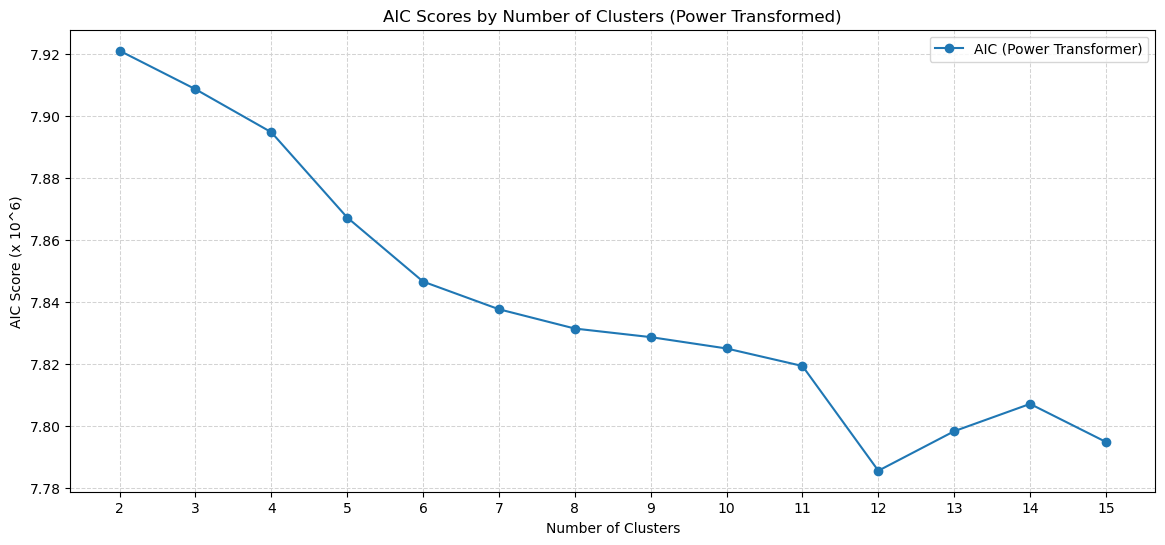

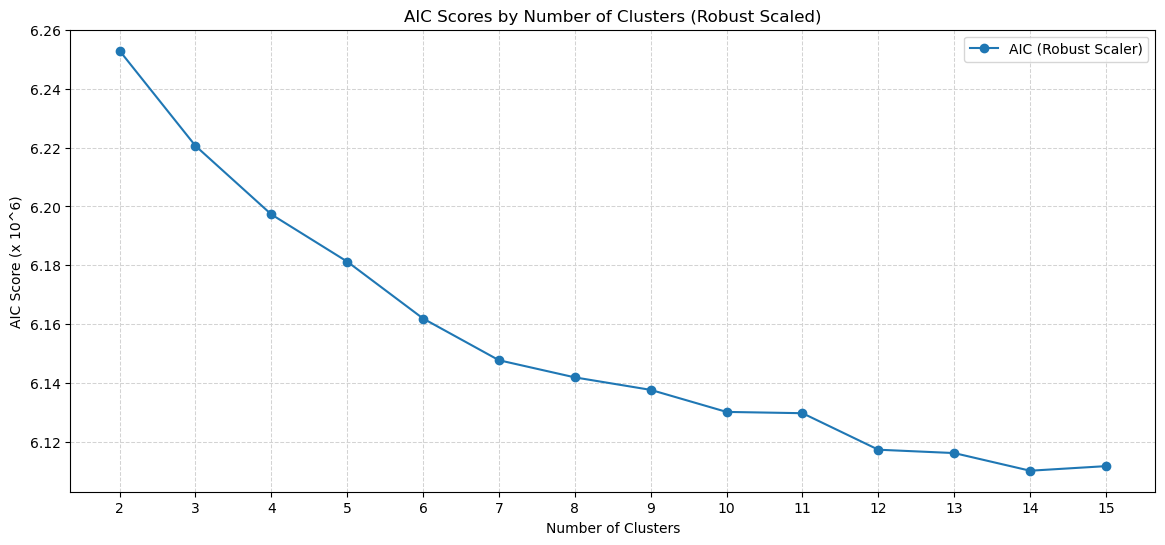

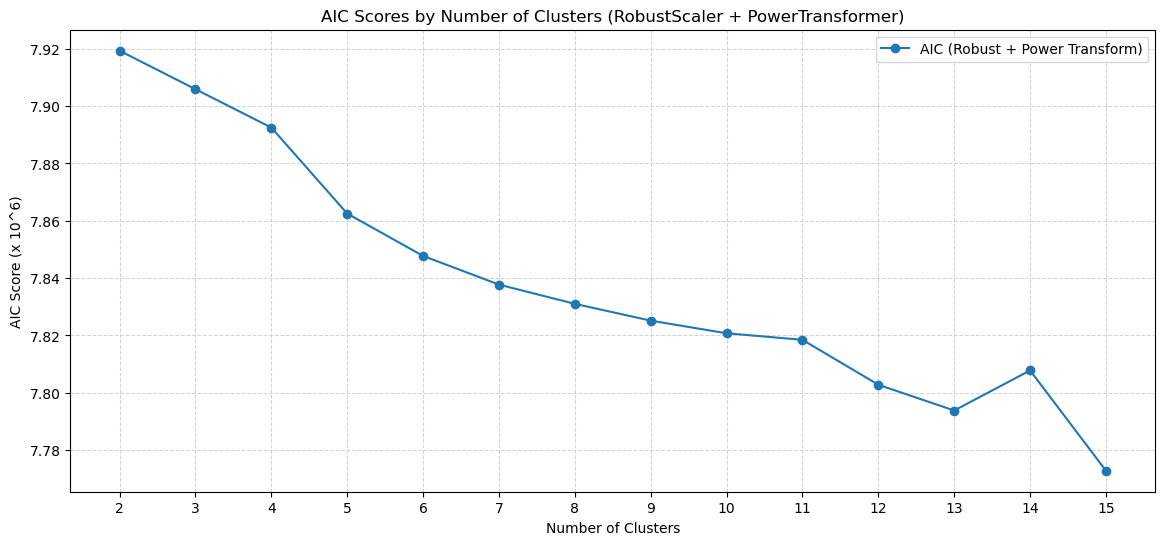

In [21]:
# Plot AIC for Power Transformed data
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(aic_values_power)/1000000, label='AIC (Power Transformer)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score (x 10^6)')
plt.title('AIC Scores by Number of Clusters (Power Transformed)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot AIC for Robust Scaled data
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(aic_values_robust)/1000000, label='AIC (Robust Scaler)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score (x 10^6)')
plt.title('AIC Scores by Number of Clusters (Robust Scaled)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot AIC for Robust Scaled Power Transformed data
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(aic_values)/1000000, label='AIC (Robust + Power Transform)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score (x 10^6)')
plt.title('AIC Scores by Number of Clusters (RobustScaler + PowerTransformer)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

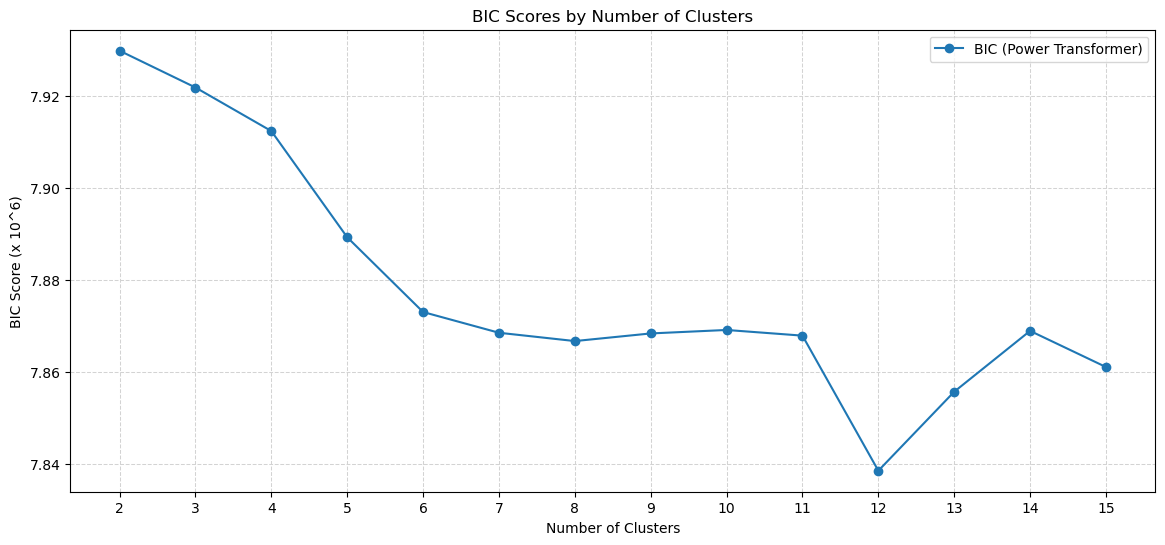

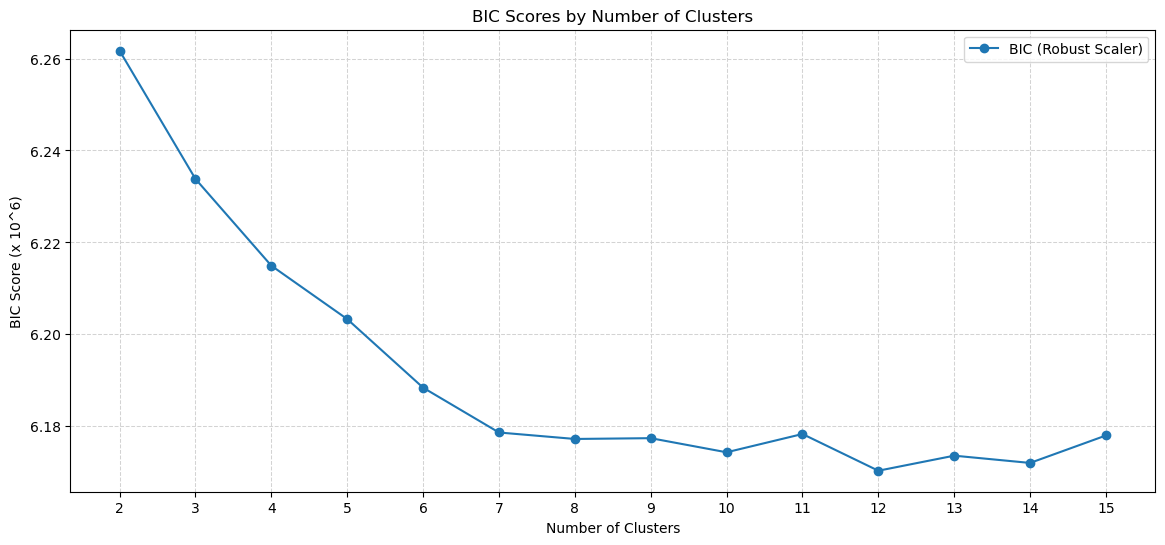

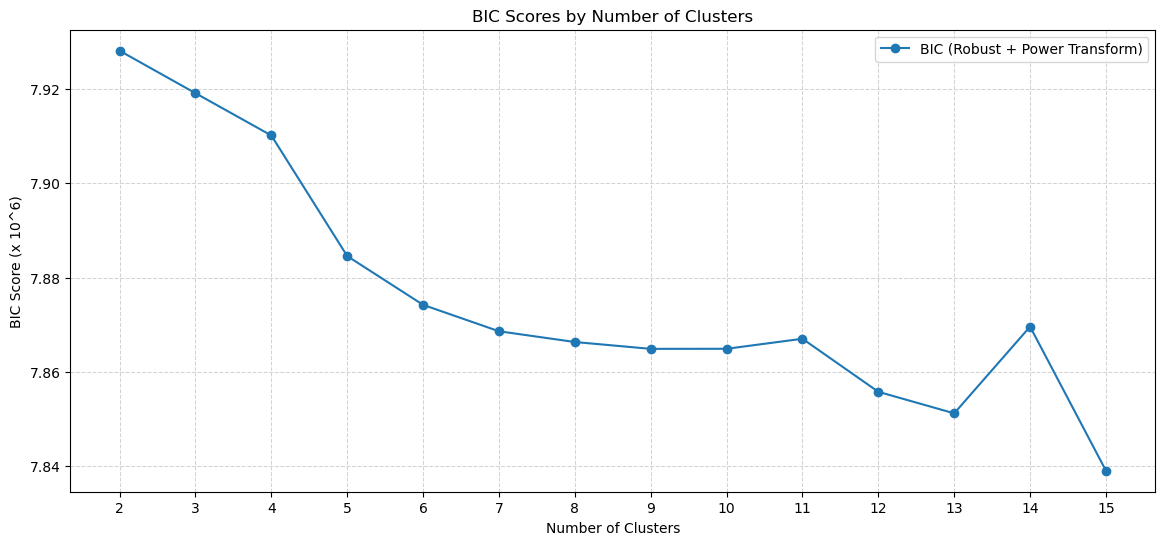

In [28]:
# Plot BIC for both transformations
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(bic_values_power)/1000000, label='BIC (Power Transformer)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score (x 10^6)')
plt.title('BIC Scores by Number of Clusters')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot BIC for both transformations
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(bic_values_robust)/1000000, label='BIC (Robust Scaler)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score (x 10^6)')
plt.title('BIC Scores by Number of Clusters')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot BIC for both transformations
plt.figure(figsize=(14, 6))
plt.plot(range(min_clusters, max_clusters+1), np.array(bic_values)/1000000, label='BIC (Robust + Power Transform)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score (x 10^6)')
plt.title('BIC Scores by Number of Clusters')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

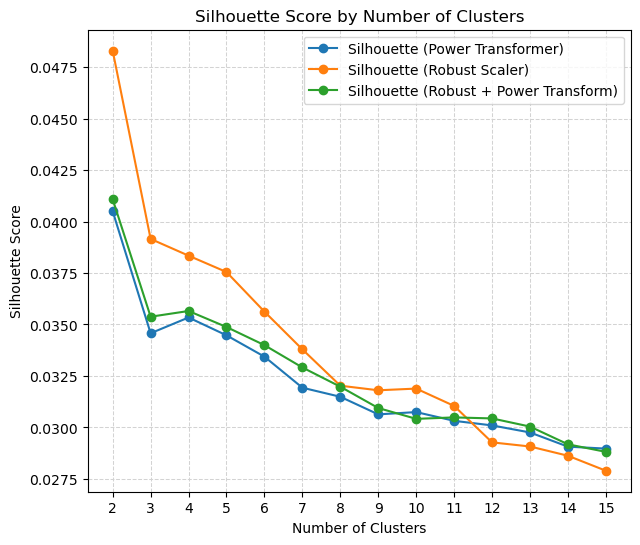

In [23]:
# Plot Silhouette Scores for both transformations
plt.figure(figsize=(7, 6))
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores_power, label='Silhouette (Power Transformer)', marker='o')
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores_robust, label='Silhouette (Robust Scaler)', marker='o')
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, label='Silhouette (Robust + Power Transform)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

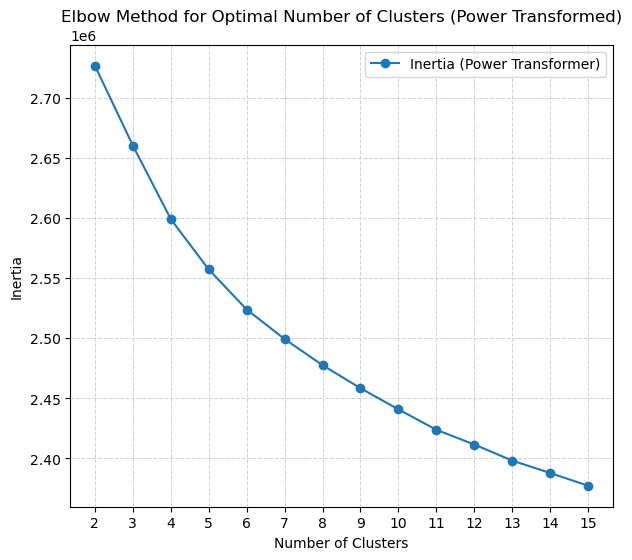

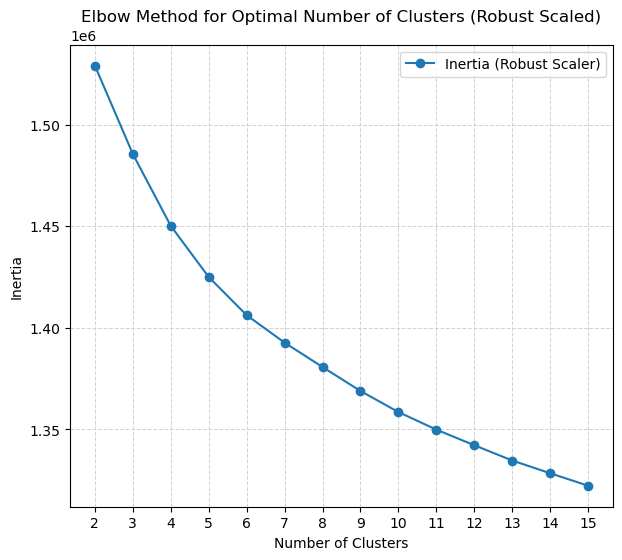

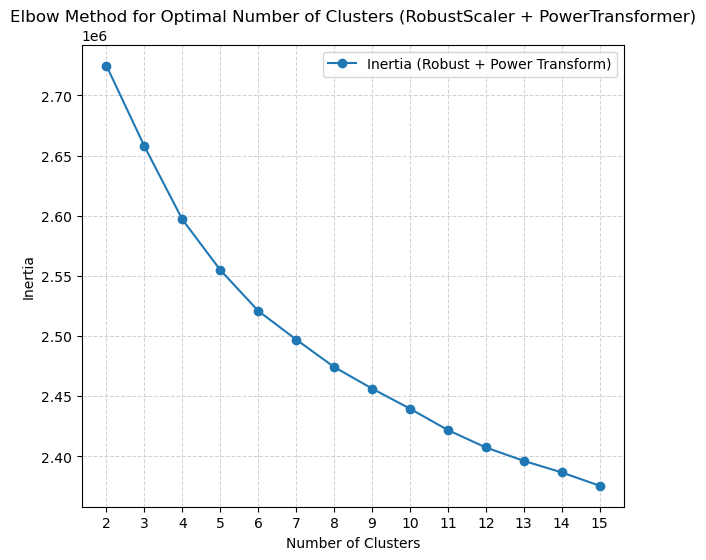

In [24]:
# Plot Elbow Method Inertia for Power Transformed data
plt.figure(figsize=(7, 6))
plt.plot(range(min_clusters, max_clusters+1), inertia_values_power, label='Inertia (Power Transformer)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Power Transformed)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot Elbow Method Inertia for Robust Scaled data
plt.figure(figsize=(7, 6))
plt.plot(range(min_clusters, max_clusters+1), inertia_values_robust, label='Inertia (Robust Scaler)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Robust Scaled)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

# Plot Elbow Method Inertia for Robust Scaled Pwer transformed data
plt.figure(figsize=(7, 6))
plt.plot(range(min_clusters, max_clusters+1), inertia_values, label='Inertia (Robust + Power Transform)', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (RobustScaler + PowerTransformer)')
plt.legend()
plt.grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
plt.xticks(range(min_clusters, max_clusters+1))
plt.show()

## 5.1 Saving Various Cluster Number Scores based on Data Transformations as a csv:

In [25]:
# Create DataFrames for all transformations and save them
transformations = ['Power Transformer', 'Robust Scaler', 'RobustScaler + PowerTransformer']
results = {
    'Power Transformer': {
        'AIC': aic_values_power,
        'BIC': bic_values_power,
        'Silhouette Score': silhouette_scores_power,
        'Inertia': inertia_values_power
    },
    'Robust Scaler': {
        'AIC': aic_values_robust,
        'BIC': bic_values_robust,
        'Silhouette Score': silhouette_scores_robust,
        'Inertia': inertia_values_robust
    },
    'RobustScaler + PowerTransformer': {
        'AIC': aic_values_robust,
        'BIC': bic_values_robust,
        'Silhouette Score': silhouette_scores_robust,
        'Inertia': inertia_values_robust
    }
}

for transformation in transformations:
    df = pd.DataFrame({
        'Number of Clusters': range(min_clusters, max_clusters+1),
        'AIC': results[transformation]['AIC'],
        'BIC': results[transformation]['BIC'],
        'Silhouette Score': results[transformation]['Silhouette Score'],
        'Inertia': results[transformation]['Inertia']
    })
    # Save the DataFrame to CSV
    df.to_csv(f'../Datasets/raw_datasets/{transformation.replace(" ", "_").lower()}_scores.csv', index=False)
    # Print the DataFrame
    print(f"\n{transformation} Scores DataFrame:")
    display(df)


Power Transformer Scores DataFrame:


,Number of Clusters,AIC,BIC,Silhouette Score,Inertia
0,2,7.920924e+06,7.929743e+06,0.040500,2.726496e+06
1,3,7.908525e+06,7.921758e+06,0.034574,2.660094e+06
2,4,7.894655e+06,7.912302e+06,0.035340,2.598918e+06
3,5,7.867186e+06,7.889247e+06,0.034474,2.557066e+06
4,6,7.846545e+06,7.873020e+06,0.033438,2.523772e+06
5,7,7.837630e+06,7.868519e+06,0.031930,2.499194e+06
6,8,7.831412e+06,7.866716e+06,0.031490,2.477463e+06
7,9,7.828654e+06,7.868371e+06,0.030635,2.458316e+06
8,10,7.824994e+06,7.869126e+06,0.030747,2.440732e+06
9,11,7.819349e+06,7.867894e+06,0.030322,2.423758e+06



Robust Scaler Scores DataFrame:


,Number of Clusters,AIC,BIC,Silhouette Score,Inertia
0,2,6.252883e+06,6.261702e+06,0.048295,1.528931e+06
1,3,6.220576e+06,6.233809e+06,0.039156,1.485443e+06
2,4,6.197295e+06,6.214942e+06,0.038342,1.450118e+06
3,5,6.181264e+06,6.203325e+06,0.037548,1.424963e+06
4,6,6.161934e+06,6.188409e+06,0.035625,1.406192e+06
5,7,6.147770e+06,6.178659e+06,0.033793,1.392669e+06
6,8,6.141948e+06,6.177252e+06,0.032028,1.380687e+06
7,9,6.137706e+06,6.177424e+06,0.031805,1.368896e+06
8,10,6.130221e+06,6.174353e+06,0.031887,1.358539e+06
9,11,6.129783e+06,6.178329e+06,0.031045,1.349890e+06



RobustScaler + PowerTransformer Scores DataFrame:


,Number of Clusters,AIC,BIC,Silhouette Score,Inertia
0,2,6.252883e+06,6.261702e+06,0.048295,1.528931e+06
1,3,6.220576e+06,6.233809e+06,0.039156,1.485443e+06
2,4,6.197295e+06,6.214942e+06,0.038342,1.450118e+06
3,5,6.181264e+06,6.203325e+06,0.037548,1.424963e+06
4,6,6.161934e+06,6.188409e+06,0.035625,1.406192e+06
5,7,6.147770e+06,6.178659e+06,0.033793,1.392669e+06
6,8,6.141948e+06,6.177252e+06,0.032028,1.380687e+06
7,9,6.137706e+06,6.177424e+06,0.031805,1.368896e+06
8,10,6.130221e+06,6.174353e+06,0.031887,1.358539e+06
9,11,6.129783e+06,6.178329e+06,0.031045,1.349890e+06


# 6.Feature Selection:

Power Transformed Data:


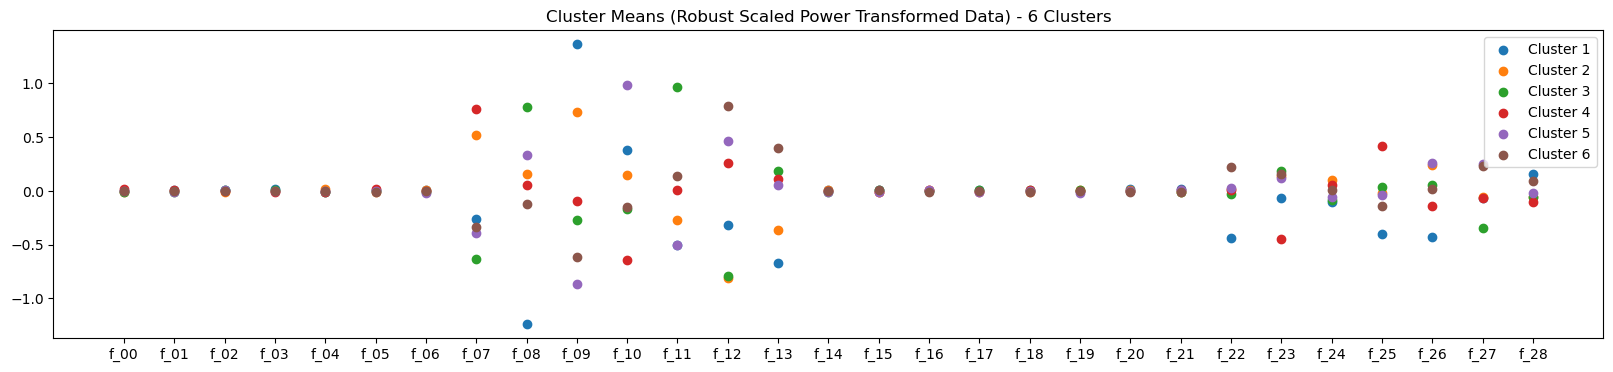

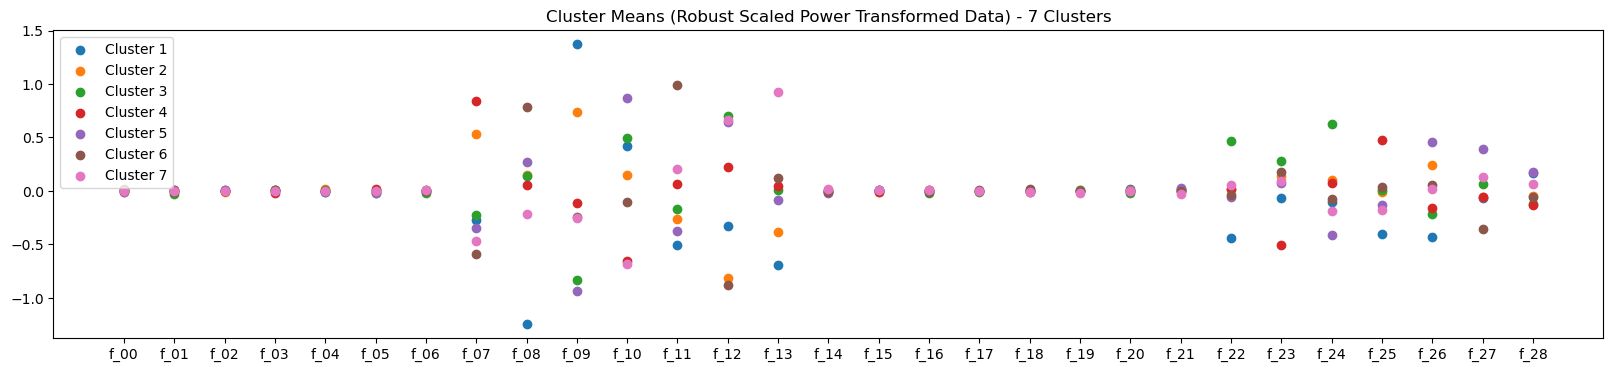

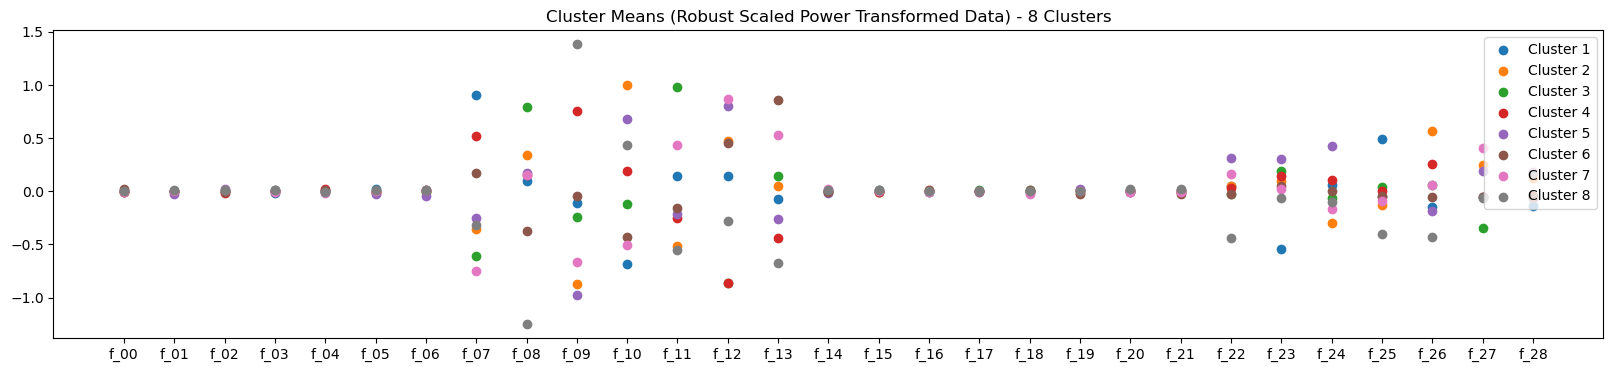

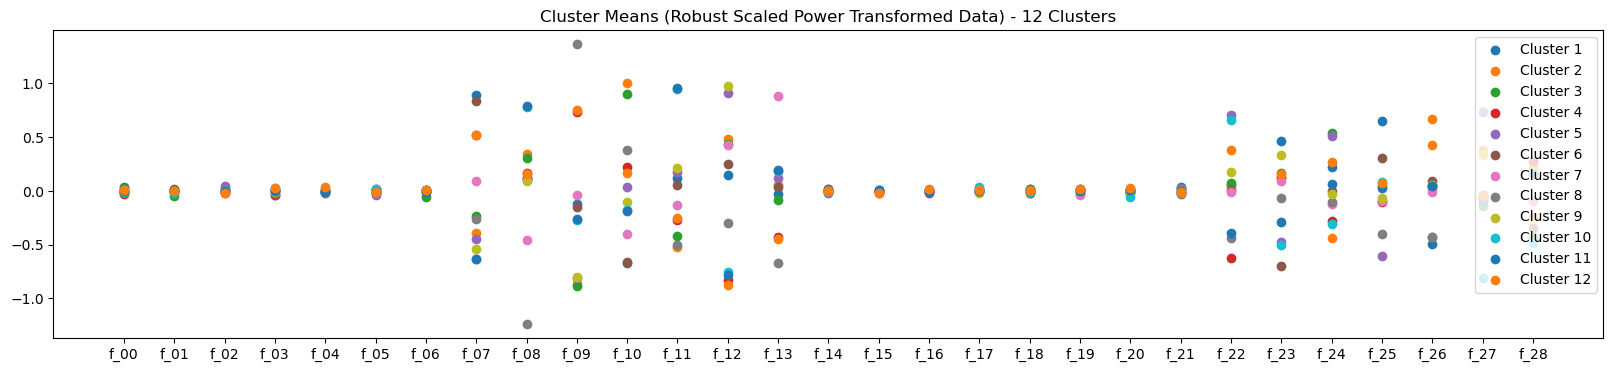

In [26]:
# Define the list of optimal clusters
optimal_clusters_list = [6, 7, 8, 12]

# Function to fit GMM and visualize cluster means
def fit_and_plot_gmm(scaled_data, data_columns, transformation_name):
    for n_clusters in optimal_clusters_list:
        # Fit GMM model with the given number of clusters
        model_gmm = GaussianMixture(n_components=n_clusters, random_state=0)
        preds_gmm = model_gmm.fit_predict(scaled_data)
        
        # Visualize the cluster means
        plt.figure(figsize=(20, 4))
        for i in range(model_gmm.means_.shape[0]):
            plt.scatter(np.arange(scaled_data.shape[1]), model_gmm.means_[i], label=f'Cluster {i+1}')
        plt.xticks(ticks=np.arange(scaled_data.shape[1]), labels=data_columns)
        plt.title(f'Cluster Means ({transformation_name} Data) - {n_clusters} Clusters')
        plt.legend()
        plt.show()

# Run the GMM and plotting for Power Transformed data
print("Power Transformed Data:")
fit_and_plot_gmm(data_robust_power_transformed, data.columns, 'Robust Scaled Power Transformed')